In [1]:
# Libraries

import matplotlib
import numpy
import os
import platform
import shutil
import sys
import warnings

In [2]:
# Ensure source path

ROOT = os.getcwd()

while not ROOT.endswith('upolanc-thesis') :
	ROOT = os.path.abspath(os.path.join(ROOT, os.pardir))

	if len(ROOT) < len('upolanc-thesis') :
		if   platform.system() == 'Linux' :
			ROOT = '/d/hpc/home/up4472/workspace/upolanc-thesis'
		elif platform.system() == 'Windows' :
			ROOT = 'C:\\Developer\\Workspace\\PyCharm\\Projects\\upolanc-thesis'
		else :
			raise ValueError()

		print(f'Warning : could not find correct directory, using default : {ROOT}')
		break

if ROOT not in sys.path :
	sys.path.append(ROOT)

os.chdir(ROOT)

In [3]:
# Code

from source.python.data.analysis import analysis_annotation
from source.python.data.analysis import analysis_assembly
from source.python.data.analysis import analysis_metadata
from source.python.data.analysis import analysis_tpm
from source.python.io            import loader
from source.python.io            import writer
from source.python               import runtime

runtime.set_numpy_format()
runtime.set_pandas_format()
runtime.set_plot_theme()

# 1. Setup

In [4]:
# Setup some directory paths

CWD = ROOT
OUT = os.path.join(CWD, 'output')
RES = os.path.join(CWD, 'resources')

OUT_DATA   = os.path.join(OUT,      'nbp01-analysis')
OUT_PLOT   = os.path.join(OUT_DATA, 'plot')
RES_GENOME = os.path.join(RES,      'genome')

shutil.rmtree(OUT_DATA, ignore_errors = True)

os.makedirs(OUT_DATA, exist_ok = True)
os.makedirs(OUT_PLOT, exist_ok = True)

print(f'     Root Directory : {CWD}')
print(f'   Output Directory : {OUT_DATA}')
print(f'   Output Directory : {OUT_PLOT}')
print(f' Resource Directory : {RES_GENOME}')

     Root Directory : C:\Developer\Workspace\PyCharm\Projects\upolanc-thesis
   Output Directory : C:\Developer\Workspace\PyCharm\Projects\upolanc-thesis\output\nbp01-analysis
   Output Directory : C:\Developer\Workspace\PyCharm\Projects\upolanc-thesis\output\nbp01-analysis\plot
 Resource Directory : C:\Developer\Workspace\PyCharm\Projects\upolanc-thesis\resources\genome


In [5]:
# Load and clean (remove non-relevant columns, rename columns to same format, etc..)

data = loader.load_resources(
	directory = RES_GENOME,
	plant     = 'arabidopsis-r36',
	clean     = True
)

gene_annotation = data['gene_annotation']
gene_assembly   = data['gene_assembly']
tissue_metadata = data['tissue_metadata']
tissue_tpm      = data['tissue_tpm']

# 2. Gene Annotation

## 2.1 Analysis

In [6]:
# Show the first few gene annotations

analysis_annotation.show(gene_annotation)

Number of rows : 439080
Number of cols : 10


,Seq,Strand,Type,Gene,Transcript,Exon,Parent,Start,End,Length
2,1,+,mRNA,AT1G01010,AT1G01010.1,NaN,AT1G01010,3631,5899,2268
3,1,+,UTR5,AT1G01010,AT1G01010.1,NaN,AT1G01010.1,3631,3759,128
5,1,+,CDS,AT1G01010,AT1G01010.1,NaN,AT1G01010.1,3760,3913,153
7,1,+,CDS,AT1G01010,AT1G01010.1,NaN,AT1G01010.1,3996,4276,280
9,1,+,CDS,AT1G01010,AT1G01010.1,NaN,AT1G01010.1,4486,4605,119


In [7]:
# Inspect gene annotation columns, and dispay the number of unique values (as well as the first few values)

analysis_annotation.inspect_columns(
	data    = gene_annotation,
	columns = None
)

Unique values per column :

 - Seq        : [      7] 1 2 3 4 5 ...
 - Strand     : [      2] + -
 - Type       : [      4] mRNA UTR5 CDS UTR3
 - Gene       : [ 27,628] AT1G01010 AT1G01020 AT1G01030 AT1G01040 AT1G01050 ...
 - Transcript : [ 48,321] AT1G01010.1 AT1G01020.6 AT1G01020.2 AT1G01020.3 AT1G01020.5 ...
 - Exon       : [      1] nan
 - Parent     : [ 75,949] AT1G01010 AT1G01010.1 AT1G01020 AT1G01020.6 AT1G01020.2 ...
 - Start      : [220,718] 3631 3760 3996 4486 4706 ...
 - End        : [220,720] 5899 3759 3913 4276 4605 ...
 - Length     : [  7,119] 2268 128 153 280 119 ...


,Seq,Strand,Type,Gene,Transcript,Exon,Parent,Start,End,Length
Datatype,object,object,object,object,object,object,object,int32,int32,int32
Null,0,0,0,0,0,439080,0,0,0,0
Unique,7,2,4,27628,48321,1,75949,220718,220720,7119


In [8]:
# Display a full gene with all its regions

analysis_annotation.show(
	data     = gene_annotation,
	query    = 'AT1G01010.1',
	query_by = 'Transcript',
	rows     = None
)

Number of rows : 9
Number of cols : 10


,Seq,Strand,Type,Gene,Transcript,Exon,Parent,Start,End,Length
2,1,+,mRNA,AT1G01010,AT1G01010.1,NaN,AT1G01010,3631,5899,2268
3,1,+,UTR5,AT1G01010,AT1G01010.1,NaN,AT1G01010.1,3631,3759,128
5,1,+,CDS,AT1G01010,AT1G01010.1,NaN,AT1G01010.1,3760,3913,153
7,1,+,CDS,AT1G01010,AT1G01010.1,NaN,AT1G01010.1,3996,4276,280
9,1,+,CDS,AT1G01010,AT1G01010.1,NaN,AT1G01010.1,4486,4605,119
11,1,+,CDS,AT1G01010,AT1G01010.1,NaN,AT1G01010.1,4706,5095,389
13,1,+,CDS,AT1G01010,AT1G01010.1,NaN,AT1G01010.1,5174,5326,152
14,1,+,CDS,AT1G01010,AT1G01010.1,NaN,AT1G01010.1,5439,5630,191
16,1,+,UTR3,AT1G01010,AT1G01010.1,NaN,AT1G01010.1,5631,5899,268


In [9]:
# Print number of genes and transcripts

print('      Gene IDs : {:,}'.format(gene_annotation['Gene'].nunique(dropna = True)))
print('Transcript IDs : {:,}'.format(gene_annotation['Transcript'].nunique(dropna = True)))

      Gene IDs : 27,628
Transcript IDs : 48,321


In [10]:
# Display region type count per gene

analysis_annotation.type_distribution(
	data    = gene_annotation,
	groupby = 'Transcript',
	regions = ['mRNA', 'UTR5', 'CDS', 'UTR3']
)

,Count,0,1,2,3,4,5+
mRNA,48321,0,48321,0,0,0,0
UTR5,56384,5606,31233,9476,1874,99,33
CDS,286067,0,8093,6686,5451,4639,23452
UTR3,48308,5999,37615,3612,1011,49,35


In [11]:
# Display the region length statistics per each region

analysis_annotation.length_statistics(
	data = gene_annotation
)

,Count,Mean,Std,Min,25%,50%,75%,Max
mRNA,48321.000,2652.603,1760.879,2.000,1572.000,2312.000,3299.000,27264.000
UTR5,56384.000,183.561,190.920,0.000,61.000,134.000,243.000,3679.000
CDS,286067.000,217.990,301.270,0.000,80.000,125.000,223.000,7760.000
UTR3,48308.000,275.153,205.004,0.000,161.000,240.000,339.000,4000.000


## 2.2 Filtering

In [12]:
# Drop mt and pt sequence annotations

mt = gene_annotation[(gene_annotation['Seq'] == 'Mt') & (gene_annotation['Type'] == 'mRNA')]
pt = gene_annotation[(gene_annotation['Seq'] == 'Pt') & (gene_annotation['Type'] == 'mRNA')]

print(f'Transcript (Mt) : ' + '{:}'.format(len(mt)))
print(f'Transcript (Pt) : ' + '{:}'.format(len(pt)))
print()

gcount = gene_annotation['Gene'].nunique()
tcount = gene_annotation['Transcript'].nunique()

gene_annotation = gene_annotation[~gene_annotation['Seq'].isin(['Mt', 'Pt'])]

print('Gene       : {:} -> {:}'.format(gcount, gene_annotation['Gene'].nunique(dropna = True)))
print('Transcript : {:} -> {:}'.format(tcount, gene_annotation['Transcript'].nunique(dropna = True)))

Transcript (Mt) : 120
Transcript (Pt) : 88

Gene       : 27628 -> 27420
Transcript : 48321 -> 48113


In [13]:
# Keep only the longest transcripts per gene

gcount = gene_annotation['Gene'].nunique()
tcount = gene_annotation['Transcript'].nunique()

mrna_annotation = gene_annotation.copy()
mrna_annotation = mrna_annotation[mrna_annotation['Type'] == 'mRNA']

mrna_annotation = mrna_annotation[mrna_annotation.groupby('Gene')['Length'].transform(max) == mrna_annotation['Length']]
mrna_annotation = mrna_annotation[mrna_annotation.groupby('Gene')['Transcript'].transform(min) == mrna_annotation['Transcript']]

gene_annotation = gene_annotation[gene_annotation['Transcript'].isin(mrna_annotation['Transcript'])]

print('Gene       : {:} -> {:}'.format(gcount, gene_annotation['Gene'].nunique(dropna = True)))
print('Transcript : {:} -> {:}'.format(tcount, gene_annotation['Transcript'].nunique(dropna = True)))

Gene       : 27420 -> 27420
Transcript : 48113 -> 27420


# 3. Gene Assembly

## 3.1 Analysis

In [14]:
# Display the length and short nucleotide sequences for each chromosome

analysis_assembly.show(
	data = gene_assembly,
	head = 25,
	tail = 25
)

Sequence [1 ] with length [30,427,671] : CCCTAAACCCTAAACCCTAAACCCT ... AGGGTTTAGGGTTTAGGGTTTAGGG
Sequence [2 ] with length [19,698,289] : NNNNNNNNNNNNNNNNNNNNNNNNN ... AGGGTTTAGGGTTTAGGGTTTAGGG
Sequence [3 ] with length [23,459,830] : NNNNNNNNNNNNNNNNNNNNNNNNN ... ACCCTAAACCCTAAACCCTAAACCC
Sequence [4 ] with length [18,585,056] : NNNNNNNNNNNNNNNNNNNNNNNNN ... AAGGGTTTAGGGTTTAGGGTTTAGG
Sequence [5 ] with length [26,975,502] : TATACCATGTACCCTCAACCTTAAA ... GTTTAGGATTTAGGGTTTTTAGATC
Sequence [Mt] with length [   366,924] : GGATCCGTTCGAAACAGGTTAGCCT ... TCGCAGAATGGAAACAAACCGGATT
Sequence [Pt] with length [   154,478] : ATGGGCGAACGACGGGAATTGAACC ... TCATAATAACTTGGTCCCGGGCATC


In [15]:
# Display the nucleotide frequency withing each chromosome

analysis_assembly.show_nucleotide_frequency(
	data     = gene_assembly,
	relative = False
)

,A,T,C,G,N,W,Y,M,K,R,S,D
1,9709674,9697113,5435374,5421151,163958,124,82,76,53,36,30,0
2,6315641,6316348,3542973,3520766,2506,18,12,5,10,7,3,0
3,7484757,7448059,4258333,4262704,5966,2,2,2,0,4,1,0
4,5940546,5914038,3371349,3356091,3030,0,0,1,0,0,0,1
5,8621974,8652238,4832253,4858759,10278,0,0,0,0,0,0,0
Mt,102464,100190,82661,81609,0,0,0,0,0,0,0,0
Pt,48546,49866,28496,27570,0,0,0,0,0,0,0,0
Total,38223602,38177852,21551439,21528650,185738,144,96,84,63,47,34,1


# 4. Tissue Metadata

## 4.1 Analysis

In [16]:
# Display the first few annotated samples

analysis_metadata.show(tissue_metadata)

Number of rows : 4139
Number of cols : 8


,Sample,Study,Control,Senescence,Age,Tissue,Group,Perturbation
0,DRR273449,DRP006986,yes,no,mature,seedling,mature_seedling,control
1,DRR273450,DRP006986,yes,no,mature,seedling,mature_seedling,control
2,DRR273451,DRP006986,yes,no,mature,seedling,mature_seedling,control
3,DRR273452,DRP006986,no,no,mature,seedling,mature_seedling,environmental
4,DRR273453,DRP006986,no,no,mature,seedling,mature_seedling,environmental


In [17]:
# Inspect sample annotation columns, and dispay the number of unique values (as well as the first few values)

analysis_metadata.inspect_columns(
	data    = tissue_metadata,
	columns = None
)

Unique values per column :

 - Sample       : [4,139] DRR273449 DRR273450 DRR273451 DRR273452 DRR273453 ...
 - Study        : [  277] DRP006986 DRP004882 DRP005301 DRP005881 DRP005877 ...
 - Control      : [    2] yes no
 - Senescence   : [    2] no yes
 - Age          : [    5] mature young missing senescence seed
 - Tissue       : [    8] seedling seed leaf root flower ...
 - Group        : [   18] mature_seedling young_seedling young_seed missing_seedling mature_leaf ...
 - Perturbation : [    8] control environmental unstressed chemical mutant ...


,Sample,Study,Control,Senescence,Age,Tissue,Group,Perturbation
Datatype,object,object,object,object,object,object,object,object
Null,0,0,0,0,0,0,0,0
Unique,4139,277,2,2,5,8,18,8


In [18]:
# Display tissue samples

template = '{:' + str(tissue_metadata['Tissue'].str.len().max()) + 's} : {:4d} [{:6.2f} %]'

for tissue, dataframe in tissue_metadata.groupby('Tissue') :
	length  = len(dataframe)
	percent = 100 * length / len(tissue_metadata)

	print(template.format(tissue, length, percent))

flower                  :   82 [  1.98 %]
leaf                    : 1566 [ 37.84 %]
other                   :   23 [  0.56 %]
root                    :  606 [ 14.64 %]
seed                    :  103 [  2.49 %]
seedling                : 1721 [ 41.58 %]
senescence_green        :   24 [  0.58 %]
senescence_reproductive :   14 [  0.34 %]


In [19]:
# Display age samples

template = '{:' + str(tissue_metadata['Age'].str.len().max()) + 's} : {:4d} [{:6.2f} %]'

for age, dataframe in tissue_metadata.groupby('Age') :
	length  = len(dataframe)
	percent = 100 * length / len(tissue_metadata)

	print(template.format(age, length, percent))

mature     : 2916 [ 70.45 %]
missing    :  165 [  3.99 %]
seed       :   49 [  1.18 %]
senescence :   38 [  0.92 %]
young      :  971 [ 23.46 %]


In [20]:
# Display group samples

template = '{:' + str(tissue_metadata['Group'].str.len().max()) + 's} : {:4d} [{:6.2f} %]'

for group, dataframe in tissue_metadata.groupby('Group') :
	length  = len(dataframe)
	percent = 100 * length / len(tissue_metadata)

	print(template.format(group, length, percent))

mature_flower           :   62 [  1.50 %]
mature_leaf             : 1442 [ 34.84 %]
mature_other            :   21 [  0.51 %]
mature_root             :  298 [  7.20 %]
mature_seed             :   82 [  1.98 %]
mature_seedling         : 1060 [ 25.61 %]
missing_flower          :   18 [  0.43 %]
missing_leaf            :  106 [  2.56 %]
missing_root            :   23 [  0.56 %]
missing_seedling        :   18 [  0.43 %]
senescence_green        :   24 [  0.58 %]
senescence_reproductive :   14 [  0.34 %]
young_flower            :    2 [  0.05 %]
young_leaf              :   18 [  0.43 %]
young_other             :    2 [  0.05 %]
young_root              :  285 [  6.89 %]
young_seed              :   21 [  0.51 %]
young_seedling          :  643 [ 15.54 %]


In [21]:
# Display perturbation samples

template = '{:' + str(tissue_metadata['Perturbation'].str.len().max()) + 's} : {:4d} [{:6.2f} %]'

for group, dataframe in tissue_metadata.groupby('Perturbation') :
	length  = len(dataframe)
	percent = 100 * length / len(tissue_metadata)

	print(template.format(group, length, percent))

chemical      :  734 [ 17.73 %]
control       : 1198 [ 28.94 %]
dna           :   51 [  1.23 %]
environmental : 1065 [ 25.73 %]
mechanical    :  128 [  3.09 %]
mutant        :  690 [ 16.67 %]
unknown       :   33 [  0.80 %]
unstressed    :  240 [  5.80 %]


## 4.2 Filtering

In [22]:
# Drop any tissue below a given threshold

threshold = 0.01
threshold = round(threshold * len(tissue_metadata))
samples   = list()

for tissue, dataframe in tissue_metadata.groupby('Tissue') :
	if len(dataframe) < threshold :
		samples.append(tissue)

tissue_metadata = tissue_metadata.loc[~tissue_metadata['Tissue'].isin(samples)]

print('Drop threshold : {}'.format(threshold))
print('Drop count     : {}'.format(len(samples)))
print('Drop groups    : {}'.format(', '.join(samples)))

Drop threshold : 41
Drop count     : 3
Drop groups    : other, senescence_green, senescence_reproductive


# 5. Tissue TPM

## 5.1 Analysis

In [23]:
# Display the first few tpm values

analysis_tpm.show(tissue_tpm)

Number of rows : 48359
Number of cols : 4147


,Transcript,DRR090011,DRR090012,DRR090013,DRR090014,DRR090015,DRR090016,DRR090017,DRR090018,DRR090019
0,AT1G01010.1,17.954,19.723,30.892,25.349,29.913,17.373,25.465,32.010,33.053
1,AT1G01020.1,2.140,0.000,0.502,1.455,2.084,0.000,1.565,0.626,0.061
2,AT1G01020.2,11.185,8.385,10.543,12.320,9.219,8.170,8.460,9.685,10.080
3,AT1G01020.3,0.000,0.000,2.558,0.000,0.006,2.017,1.933,0.000,0.000
4,AT1G01020.4,3.149,3.576,0.000,1.396,0.574,1.419,1.615,2.902,2.887


In [24]:
# Print the global tpm statistics

matrix = tissue_tpm.iloc[:, 1:].to_numpy()

print('   Max TPM : {:13,.5f}'.format(numpy.max(matrix)))
print('  Mean TPM : {:13,.5f}'.format(numpy.mean(matrix)))
print('Median TPM : {:13,.5f}'.format(numpy.median(matrix)))
print('   Min TPM : {:13,.5f}'.format(numpy.min(matrix)))

   Max TPM : 586,287.00000
  Mean TPM :      20.67867
Median TPM :       1.10162
   Min TPM :       0.00000


In [25]:
# Print the amoutn of tpm reading below or equal 1.0

matrix = tissue_tpm.iloc[:, 1:].to_numpy()

total = numpy.size(matrix)
where = numpy.count_nonzero(matrix <= 1.0)
other = total - where

print('   Total elements : {:11,d}'.format(total))
print('Non Zero elements : {:11,d} [{:5.2f} %]'.format(where, 100 * where / total))
print('    Zero elements : {:11,d} [{:5.2f} %]'.format(other, 100 * other / total))

   Total elements : 200,496,414
Non Zero elements :  98,168,942 [48.96 %]
    Zero elements : 102,327,472 [51.04 %]


In [26]:
# Print the amoutn of tpm reading below or equal 0.0

matrix = tissue_tpm.iloc[:, 1:].to_numpy()

total = numpy.size(matrix)
where = numpy.count_nonzero(matrix <= 0.0)
other = total - where

print('Elements          : {:11,d}'.format(total))
print('Elements <= 0.000 : {:11,d} [{:5.2f} %]'.format(where, 100 * where / total))
print('Elements >  0.000 : {:11,d} [{:5.2f} %]'.format(other, 100 * other / total))

Elements          : 200,496,414
Elements <= 0.000 :  54,210,216 [27.04 %]
Elements >  0.000 : 146,286,198 [72.96 %]


In [27]:
# Add small shift to zeros

tissue_tpm = tissue_tpm.replace(to_replace = 0.0, value = 0.001, inplace = False)

matrix = tissue_tpm.iloc[:, 1:].to_numpy()

total = numpy.size(matrix)
where = numpy.count_nonzero(matrix <= 0.001)
other = total - where

print('Elements          : {:11,d}'.format(total))
print('Elements <= 0.001 : {:11,d} [{:5.2f} %]'.format(where, 100 * where / total))
print('Elements >  0.001 : {:11,d} [{:5.2f} %]'.format(other, 100 * other / total))

Elements          : 200,496,414
Elements <= 0.001 :  57,404,483 [28.63 %]
Elements >  0.001 : 143,091,931 [71.37 %]


## 5.2 Filtering

In [28]:
# Filter samples that are problematic globally (looks at entire sample through all transcripts)

dataframe, sample_filter = analysis_tpm.filter_samples(
	data    = tissue_tpm,
	cutoff  = {
		'max' : 0.0,
		'sum' : 0.0,
		'std' : 0.0,
		'px0' : [
			0.0,
			0.0
		]
	}
)

if len(sample_filter) > 0 :
	item = list(sample_filter.keys())[0]
	data = dataframe[item].to_numpy()

	print()
	print(f'Sample <{item}> has a sum expression : {data.sum():9.4f}')
	print(f'Sample <{item}> has a max expression : {data.max():9.4f}')
	print(f'Sample <{item}> has a min expression : {data.min():9.4f}')

if len(sample_filter) > 0 :
	array = list(sample_filter.keys())
	tissue_tpm = tissue_tpm.drop(columns = array)

Problematic items found : 0


In [29]:
# Filter genes that are problematic globally (looks at entire transcript through all samples)

dataframe, gene_filter = analysis_tpm.filter_genes(
	data    = tissue_tpm,
	cutoff  = {
		'max' : 0.0,
		'sum' : 0.0,
		'std' : 0.0,
		'px0' : [
			0.0,
			0.0
		]
	}
)

if len(gene_filter) > 0 :
	item = list(gene_filter.keys())[0]
	data = dataframe[item].to_numpy()

	print()
	print(f'Gene <{item}> has a sum expression : {data.sum():9.4f}')
	print(f'Gene <{item}> has a max expression : {data.max():9.4f}')
	print(f'Gene <{item}> has a min expression : {data.min():9.4f}')

if len(gene_filter) > 0 :
	array = list(gene_filter.keys())
	tissue_tpm = tissue_tpm[~tissue_tpm['Transcript'].isin(array)]

Problematic items found : 20 --> AT1G24475.1 ; var(TPM) = 0.0

Gene <AT1G24475.1> has a sum expression :    4.1460
Gene <AT1G24475.1> has a max expression :    0.0010
Gene <AT1G24475.1> has a min expression :    0.0010


# 6. Data

## 6.1 Syncronization

In [30]:
# Check for sample matching between tpm and metadata tables

x = set(tissue_metadata['Sample'].dropna())
y = set(tissue_tpm.columns[1:].dropna())

sample_i = list(x.intersection(y))
sample_x = list(x.difference(y))
sample_y = list(y.difference(x))

print(f'Samples in <tissue-metadata> : {len(sample_i)} / {len(x)}')
print(f'Samples in <tissue-tpm>      : {len(sample_i)} / {len(y)}')
print()
print(f'Samples missing in <tissue-metadata> : [{len(sample_y)}] ' + ' '.join(sample_y[:5]) + (' ...' if len(sample_y) > 5 else ''))
print(f'Samples missing in <tissue-tpm>      : [{len(sample_x)}] ' + ' '.join(sample_x[:5]) + (' ...' if len(sample_x) > 5 else ''))

if len(sample_x) > 0 :
	tissue_metadata = tissue_metadata[~tissue_metadata['Sample'].isin(sample_x)]

if len(sample_y) > 0 :
	tissue_tpm = tissue_tpm.drop(columns = sample_y)

Samples in <tissue-metadata> : 4077 / 4078
Samples in <tissue-tpm>      : 4077 / 4146

Samples missing in <tissue-metadata> : [69] SRR3151787 SRR1171800 SRR3087310 SRR1171798 SRR7889742 ...
Samples missing in <tissue-tpm>      : [1] DRR273449


In [31]:
# Check for gene matching between tpm and annotation tables

x = set(tissue_tpm['Transcript'].dropna())
y = set(gene_annotation['Transcript'].dropna())

gene_i = list(x.intersection(y))
gene_x = list(x.difference(y))
gene_y = list(y.difference(x))

print(f'Samples in <tissue-tpm>      : {len(gene_i)} / {len(x)}')
print(f'Samples in <gene-annotation> : {len(gene_i)} / {len(y)}')
print()
print(f'Genes missing in <tissue-tpm>      : [{len(gene_y)}] ' + ' '.join(gene_y[:5]) + (' ...' if len(gene_y) > 5 else ''))
print(f'Genes missing in <gene-annotation> : [{len(gene_x)}] ' + ' '.join(gene_x[:5]) + (' ...' if len(gene_x) > 5 else ''))

if len(gene_x) > 0 :
	tissue_tpm = tissue_tpm[~tissue_tpm['Transcript'].isin(gene_x)]

if len(gene_y) > 0 :
	gene_annotation = gene_annotation[~gene_annotation['Transcript'].isin(gene_y)]

Samples in <tissue-tpm>      : 27403 / 48339
Samples in <gene-annotation> : 27403 / 27420

Genes missing in <tissue-tpm>      : [17] AT1G64633.1 AT4G09355.1 AT5G07545.1 AT4G12485.1 AT1G33355.1 ...
Genes missing in <gene-annotation> : [20936] AT2G27790.3 AT1G28090.5 AT1G25550.2 AT5G36930.2 AT4G16330.2 ...


## 6.2 Filtering

In [32]:
# Filter genes that are problematic locally (looks at entire transcript through grouped samples; at least one group must satisfy the filter to keep)

gene_common, gene_filter = analysis_tpm.filter_genes_per_group(
	metadata = tissue_metadata,
	tpm      = tissue_tpm,
	group    = 'Tissue',
	cutoff   = {
		'max' : 0.0,
		'sum' : 0.0,
		'std' : 0.0,
		'px0' : [
			1.0, # threshold
			0.5  # percentil
		]        # at least 50% of values in a single group must be above 1.0 TPM
	}
)

if len(gene_common) > 0 :
	tissue_tpm = tissue_tpm[~tissue_tpm['Transcript'].isin(gene_common)]

Problematic items found : 9216 --> AT1G01060.6 ; p50(TPM) < 1.0
Problematic items found : 12240 --> AT1G01060.6 ; p50(TPM) < 1.0
Problematic items found : 10191 --> AT1G01030.1 ; p50(TPM) < 1.0
Problematic items found : 11541 --> AT1G01060.6 ; p50(TPM) < 1.0
Problematic items found : 10653 --> AT1G01060.6 ; p50(TPM) < 1.0

Problematic items found : 6824 --> AT3G19410.1 ; p50(TPM) < 1.0 @ seedling


In [33]:
# Check for gene matching between tpm and annotation tables

x = set(tissue_tpm['Transcript'].dropna())
y = set(gene_annotation['Transcript'].dropna())

gene_i = list(x.intersection(y))
gene_x = list(x.difference(y))
gene_y = list(y.difference(x))

print(f'Samples in <tissue-tpm>      : {len(gene_i)} / {len(x)}')
print(f'Samples in <gene-annotation> : {len(gene_i)} / {len(y)}')
print()
print(f'Genes missing in <tissue-tpm>      : [{len(gene_y)}] ' + ' '.join(gene_y[:5]) + (' ...' if len(gene_y) > 5 else ''))
print(f'Genes missing in <gene-annotation> : [{len(gene_x)}] ' + ' '.join(gene_x[:5]) + (' ...' if len(gene_x) > 5 else ''))

if len(gene_x) > 0 :
	tissue_tpm = tissue_tpm[~tissue_tpm['Transcript'].isin(gene_x)]

if len(gene_y) > 0 :
	gene_annotation = gene_annotation[~gene_annotation['Transcript'].isin(gene_y)]

Samples in <tissue-tpm>      : 20579 / 20579
Samples in <gene-annotation> : 20579 / 27403

Genes missing in <tissue-tpm>      : [6824] AT3G19410.1 AT2G23980.1 AT1G62915.1 AT4G08025.1 AT1G33010.1 ...
Genes missing in <gene-annotation> : [0] 


# 7. Save

In [34]:
# Save the updated and synchronized tables

writer.write_csv(
	data         = tissue_metadata,
	filename     = os.path.join(OUT_DATA, 'tissue-metadata.csv'),
	write_index  = False
)

writer.write_csv(
	data        = tissue_tpm,
	filename    = os.path.join(OUT_DATA, 'tissue-tpm.csv'),
	write_index = False
)

writer.write_csv(
	data        = gene_annotation,
	filename    = os.path.join(OUT_DATA, 'gene-annotation.csv'),
	write_index = False
)

# 8. Visualization

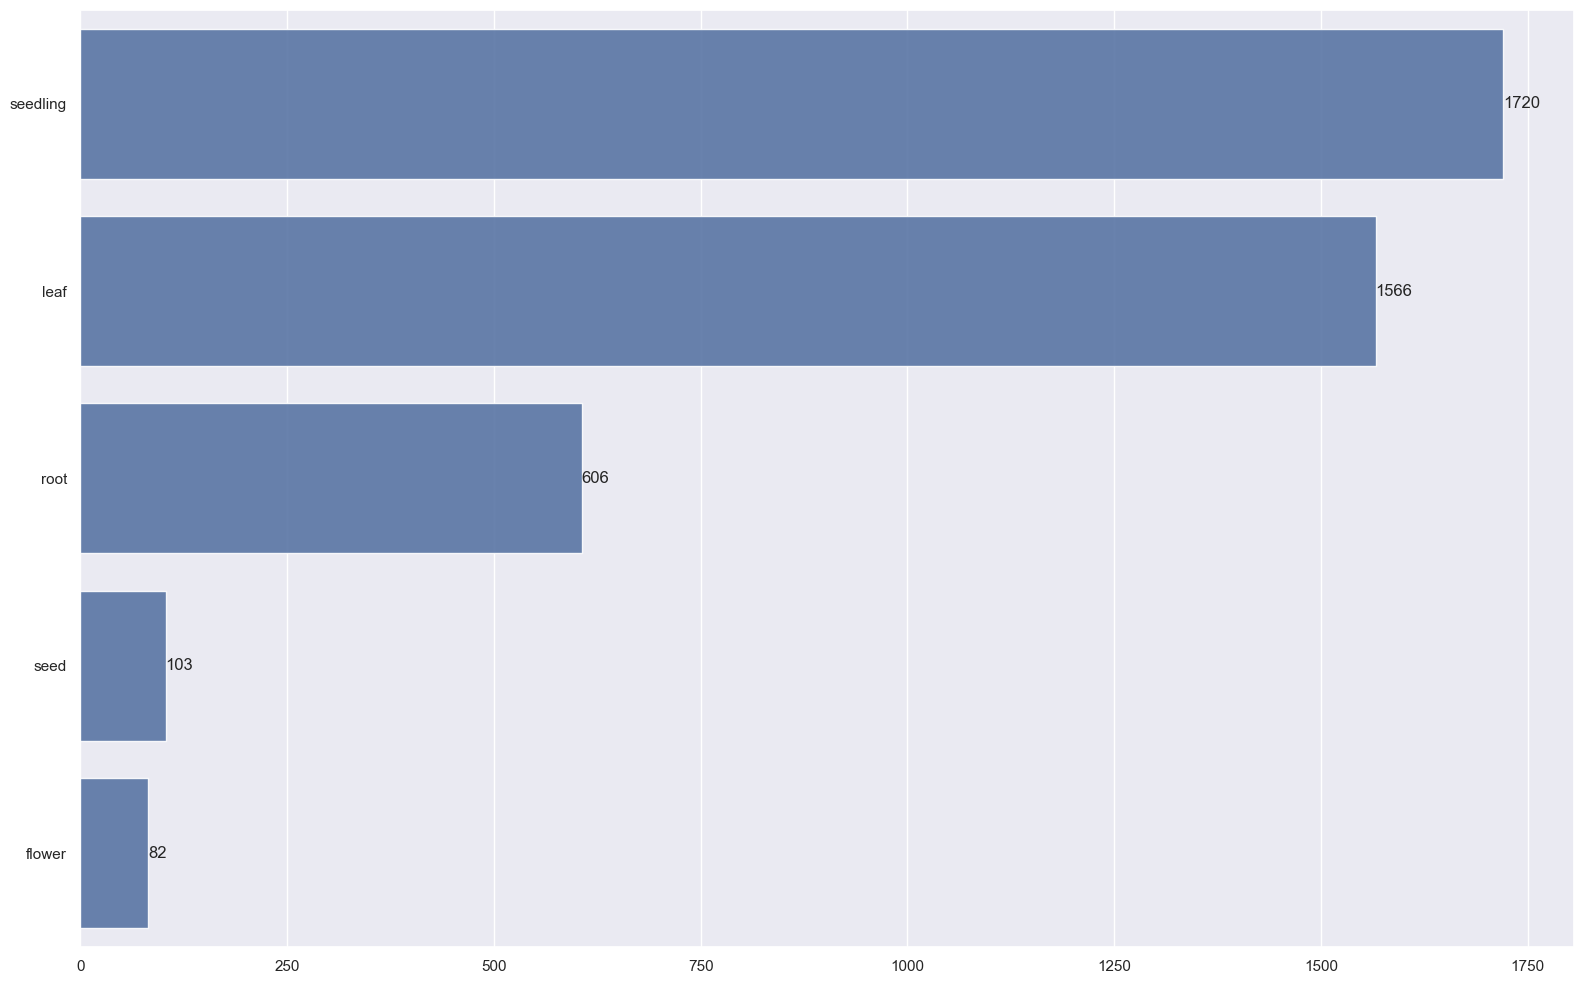

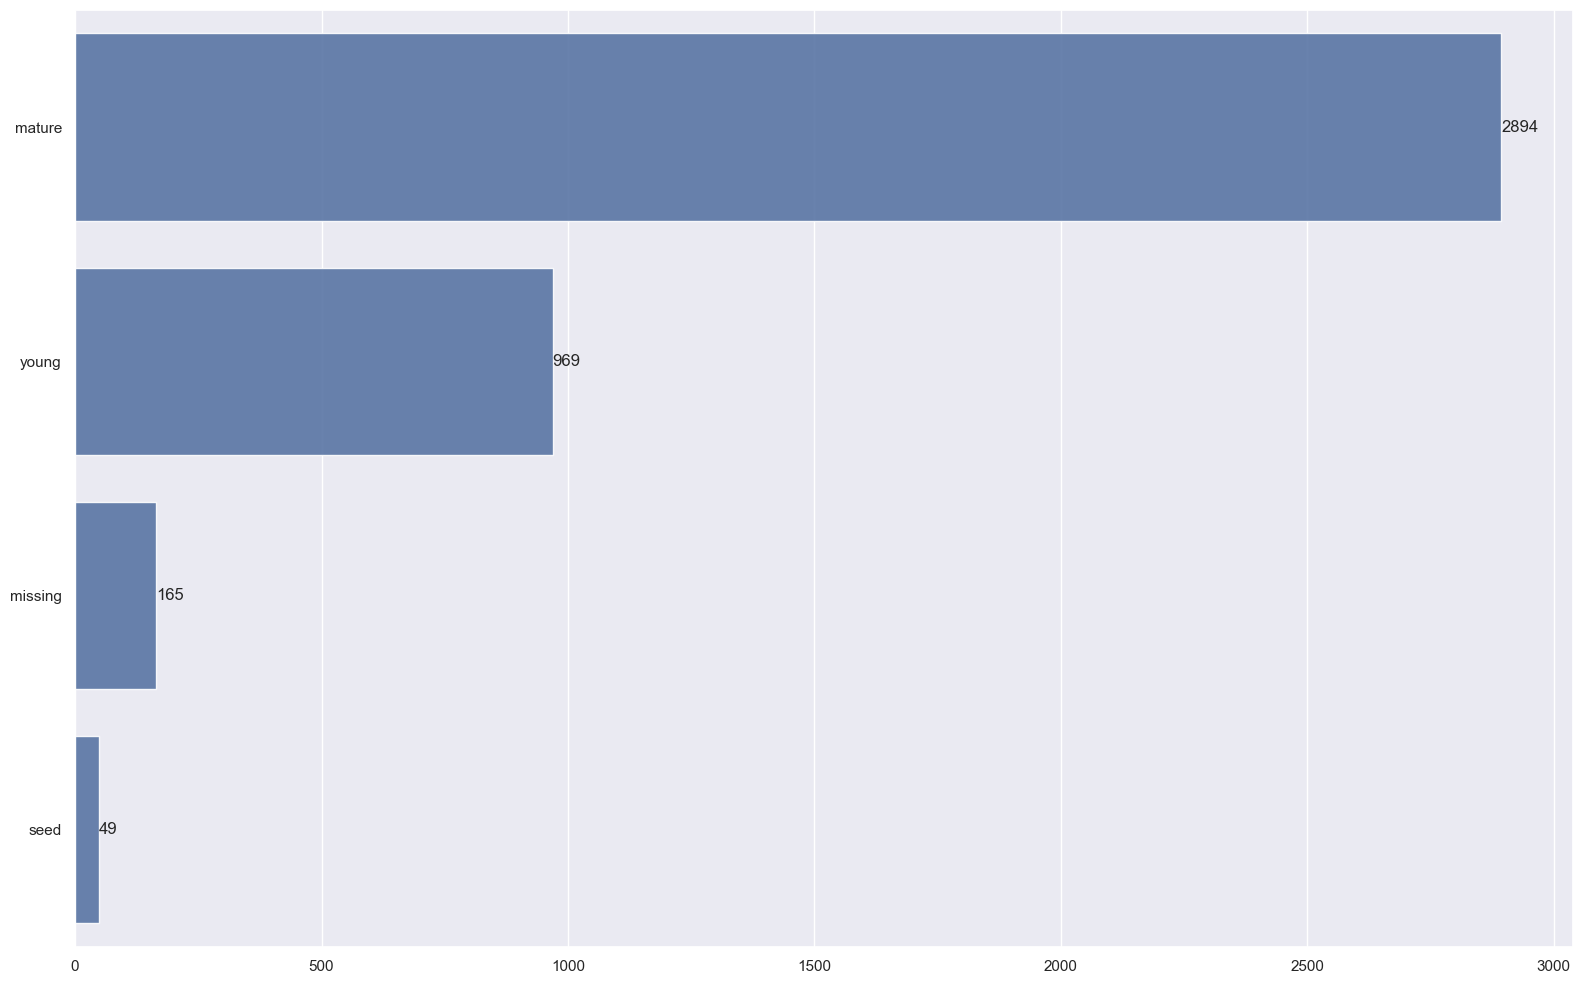

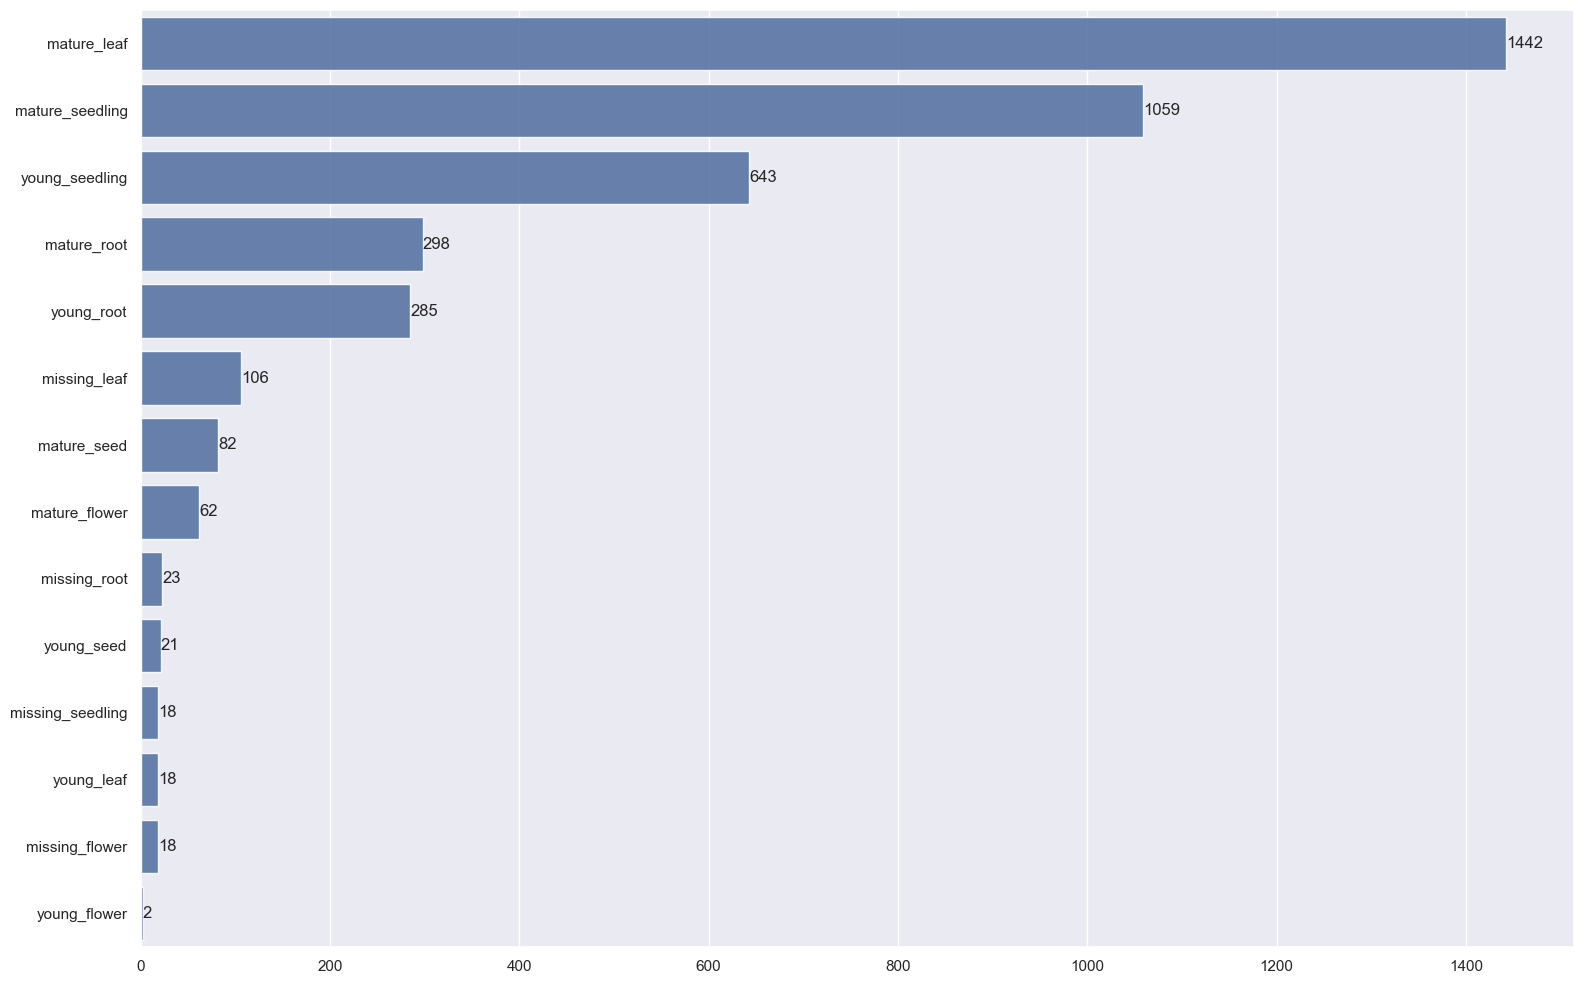

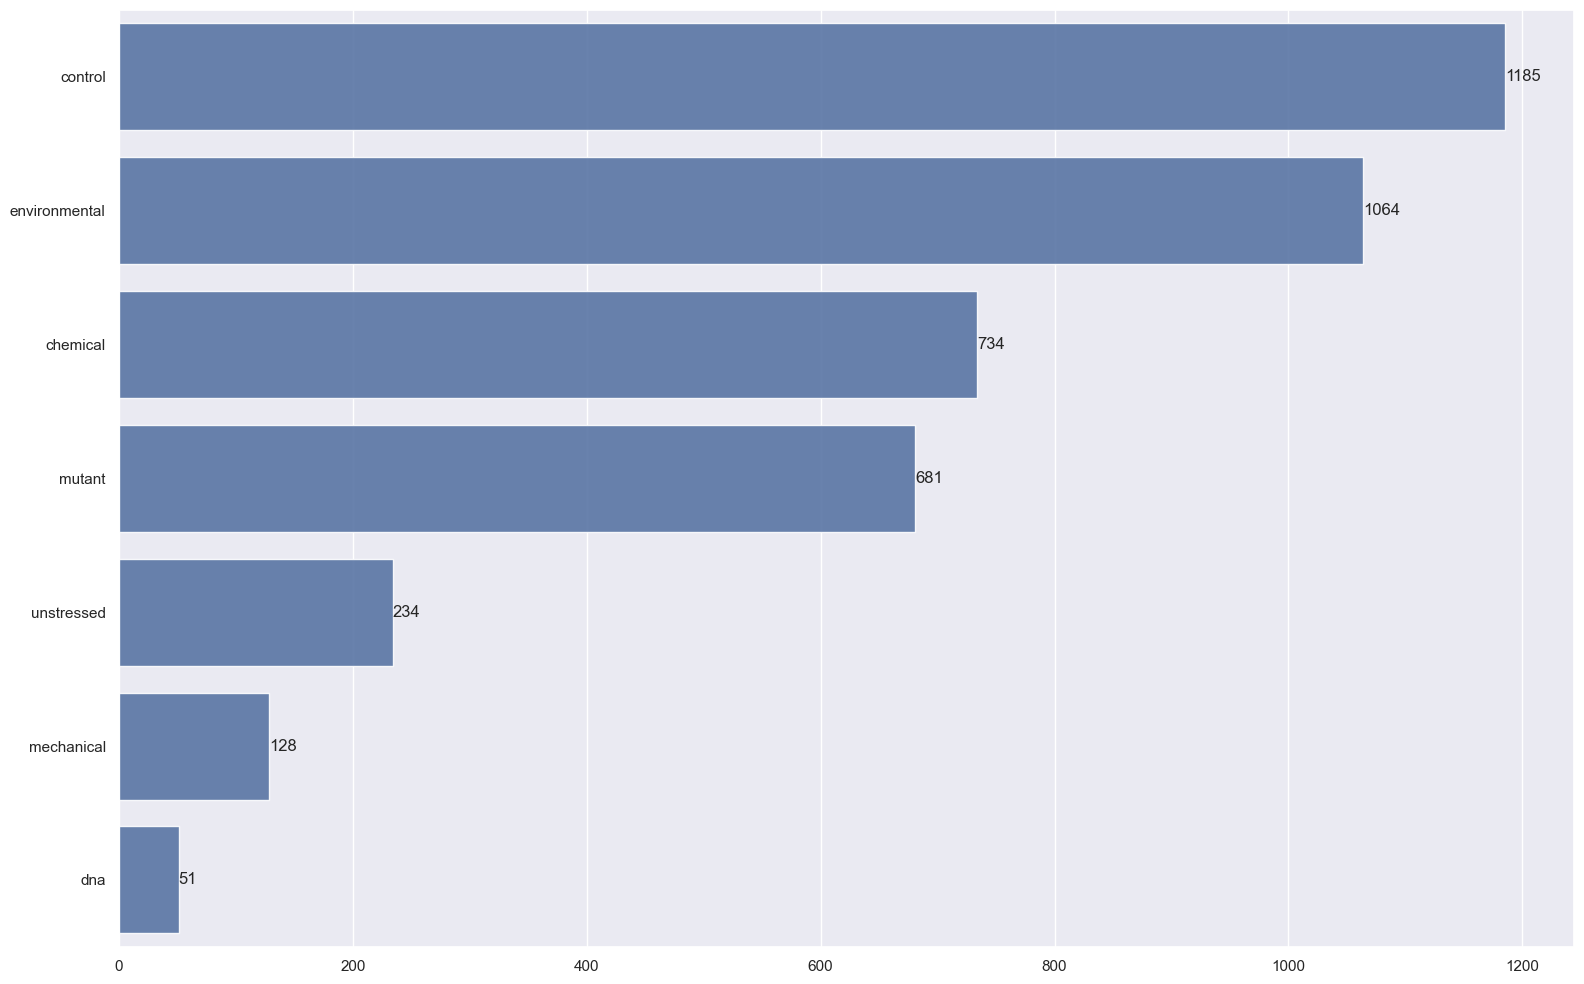

In [35]:
# Display the distribution of groups for all samples

for group in ['tissue', 'age', 'group', 'perturbation'] :
	analysis_metadata.distribution_barplot(
		data     = tissue_metadata,
		group    = group.capitalize(),
		filename = os.path.join(OUT_PLOT, 'distribution-' + group)
	)

	matplotlib.pyplot.show()

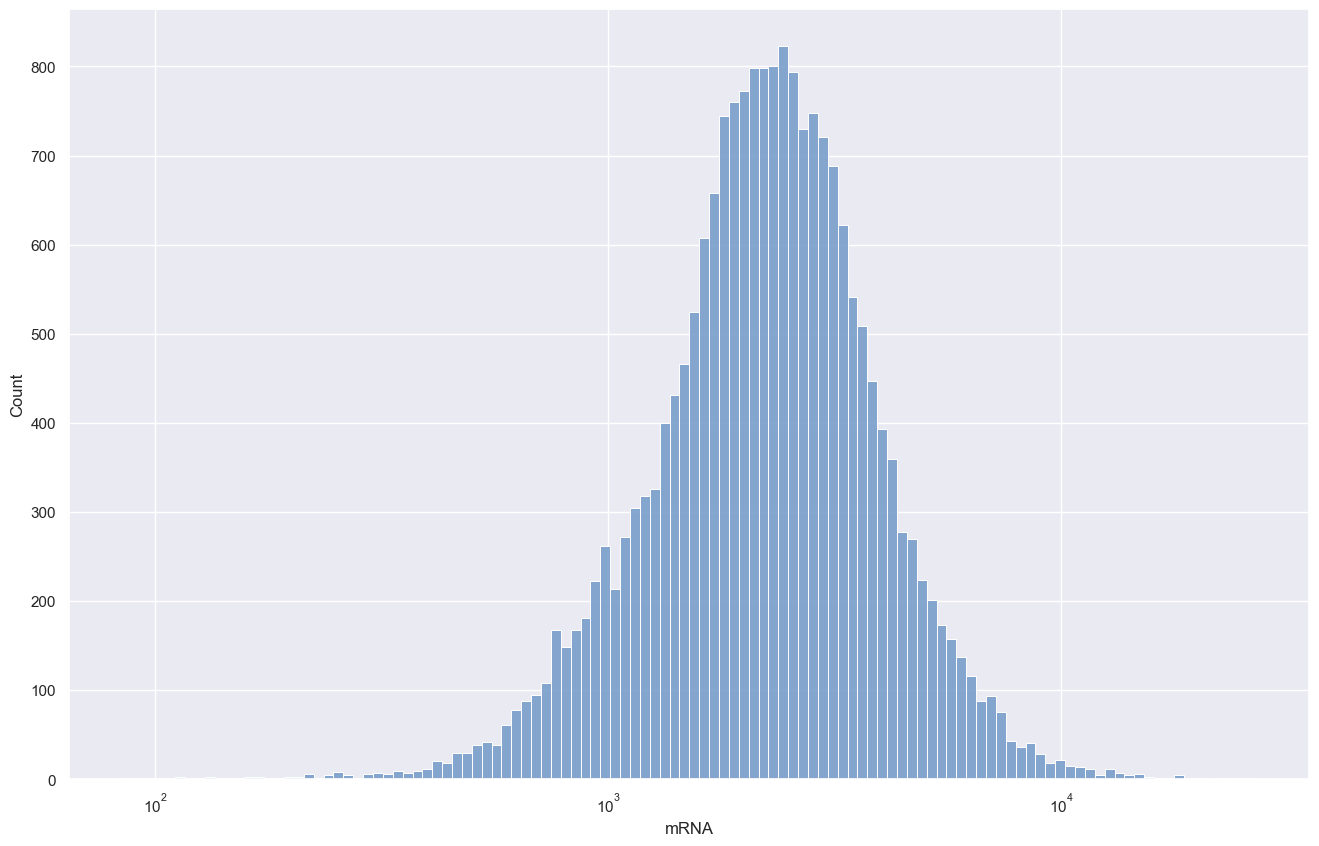

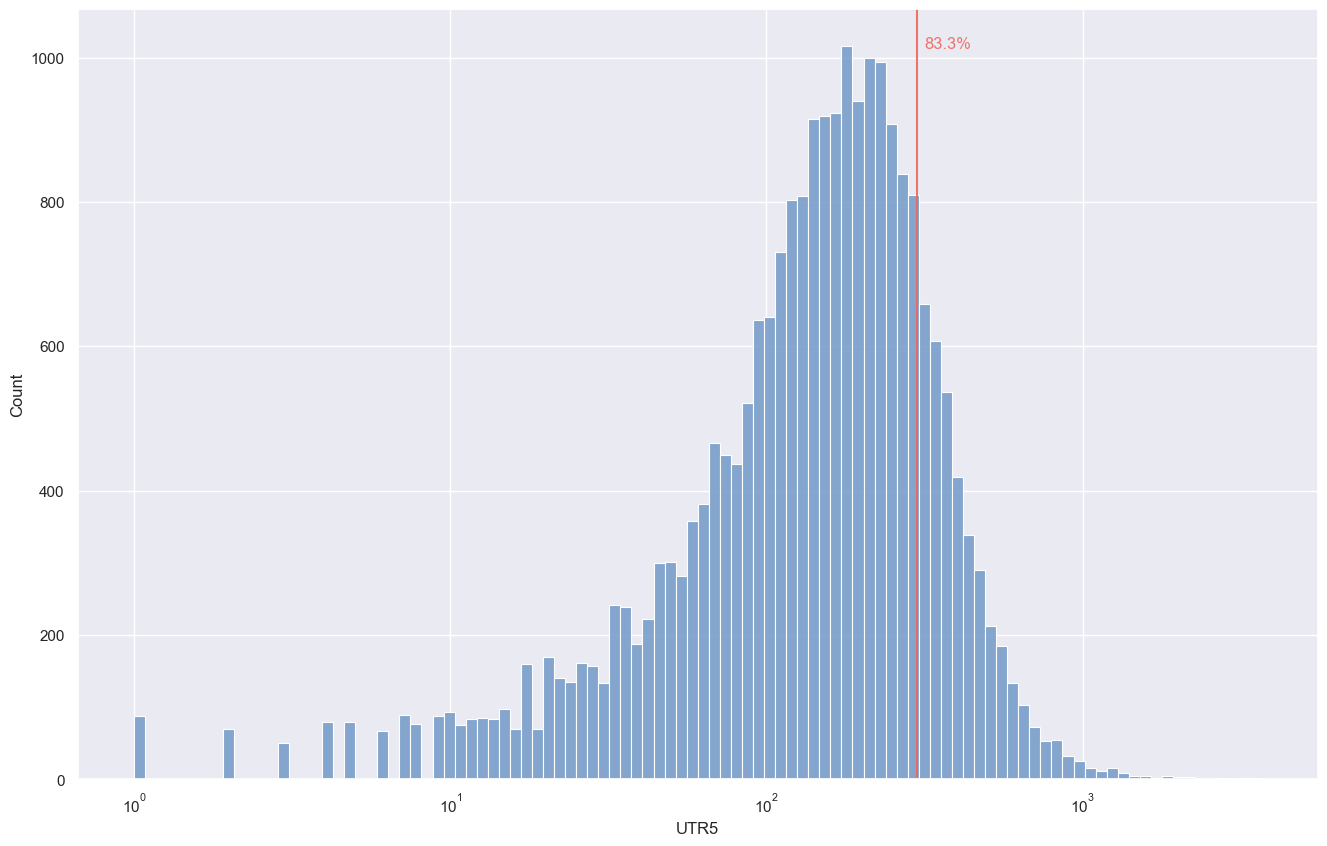

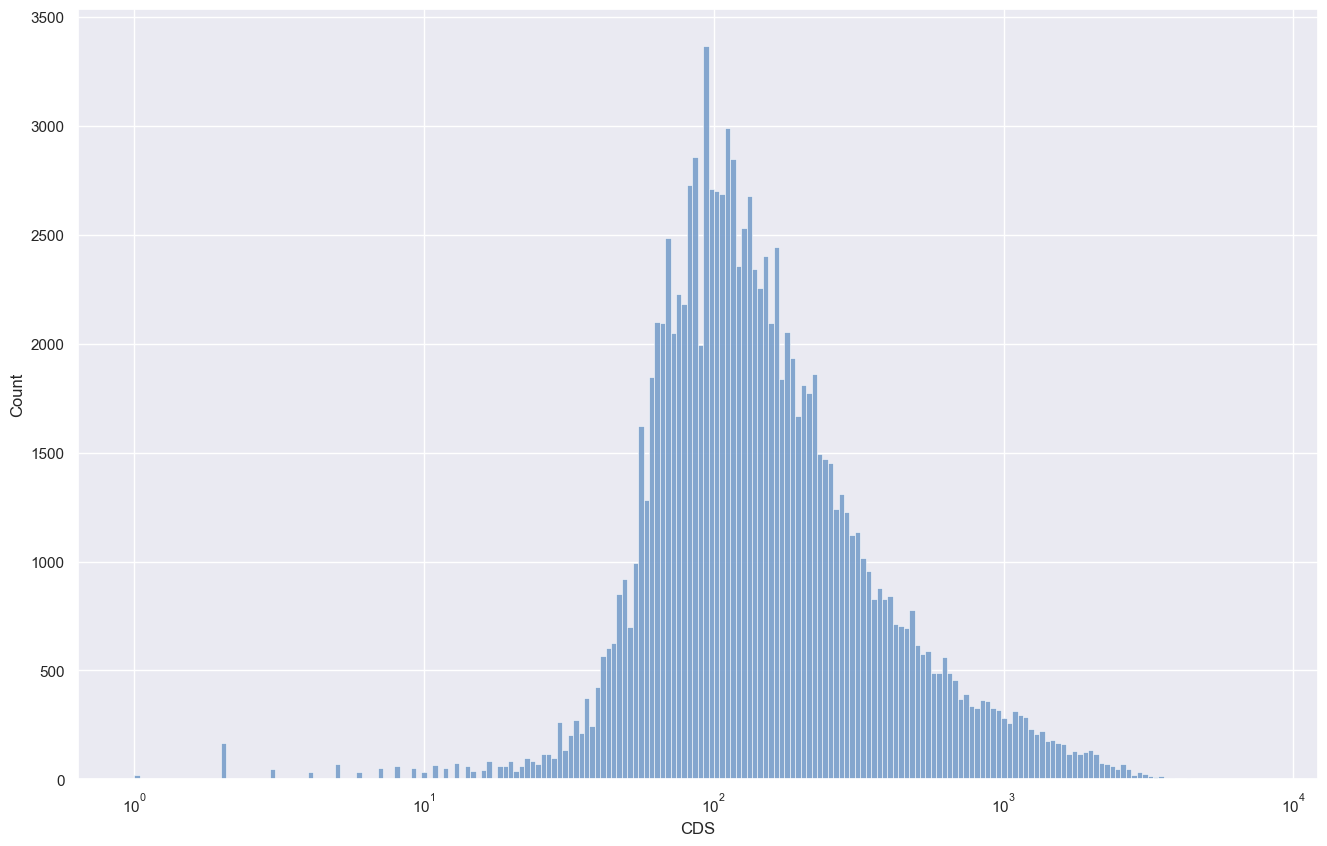

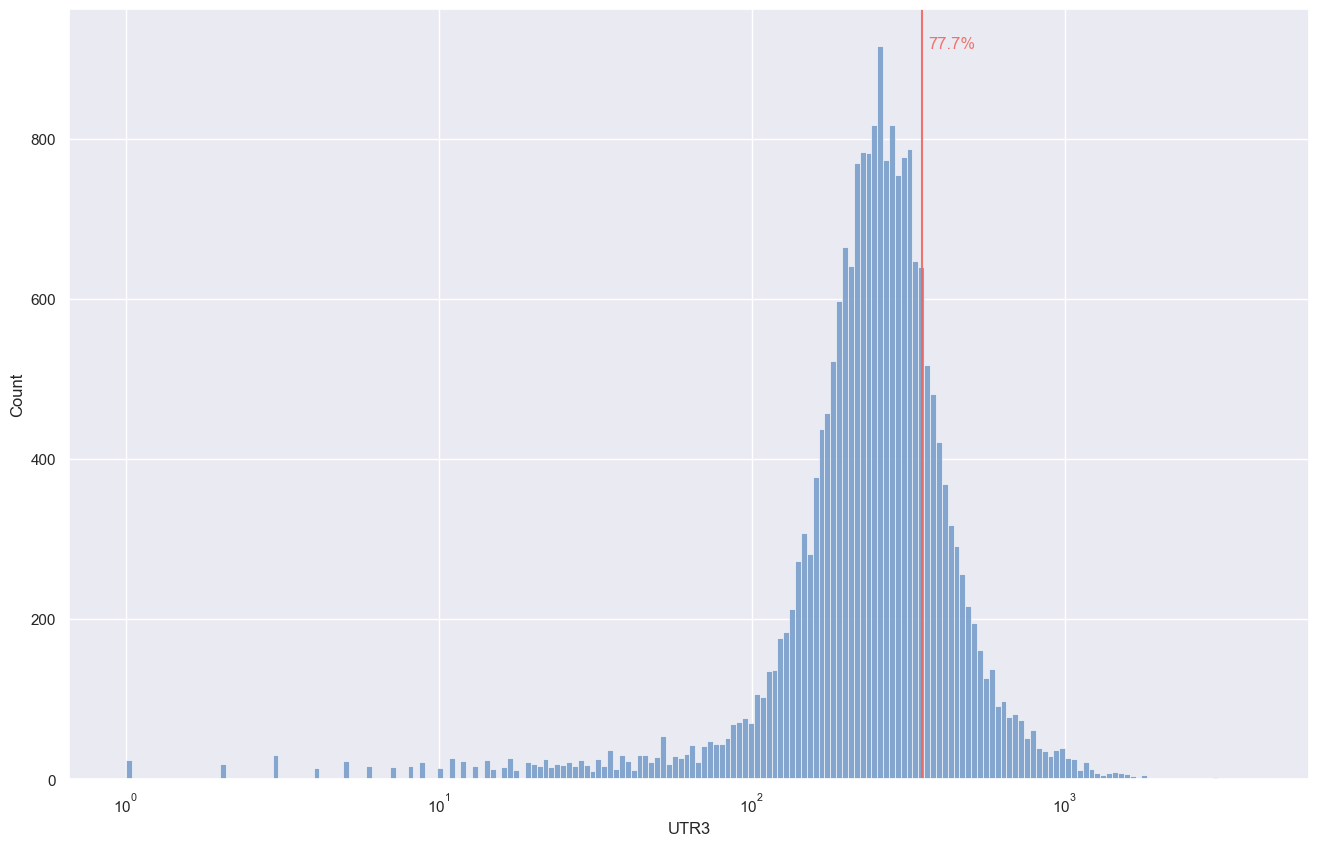

In [36]:
# Display the region length distributions per each region

with warnings.catch_warnings() :
	warnings.simplefilter('ignore')

	for group, vline in zip(['mRNA', 'UTR5', 'CDS', 'UTR3'], [0, 300, 0, 350]) :
		analysis_annotation.length_histplot(
			data     = gene_annotation,
			value    = group,
			vline    = vline,
			filename = os.path.join(OUT_PLOT, 'length-region-' + group.lower())
		)

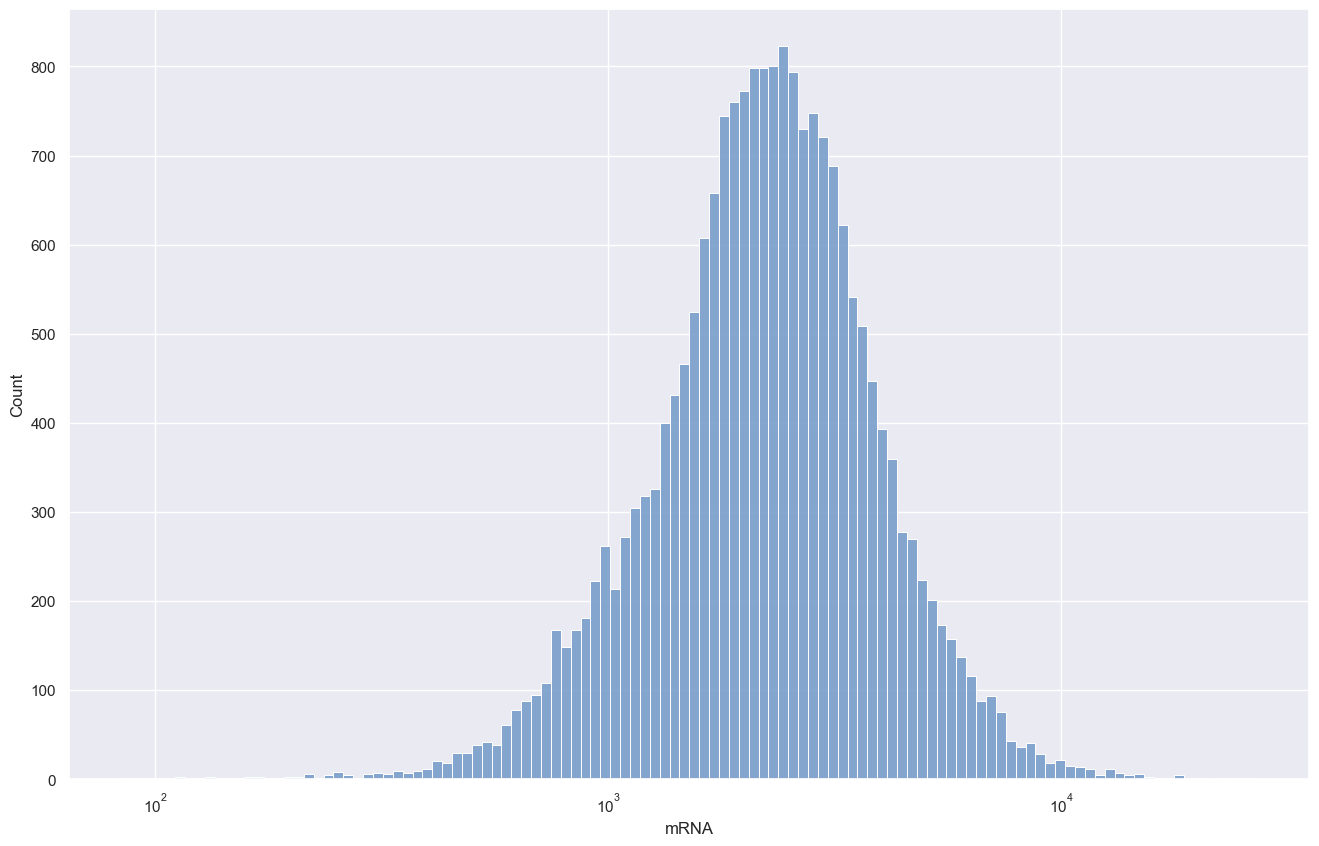

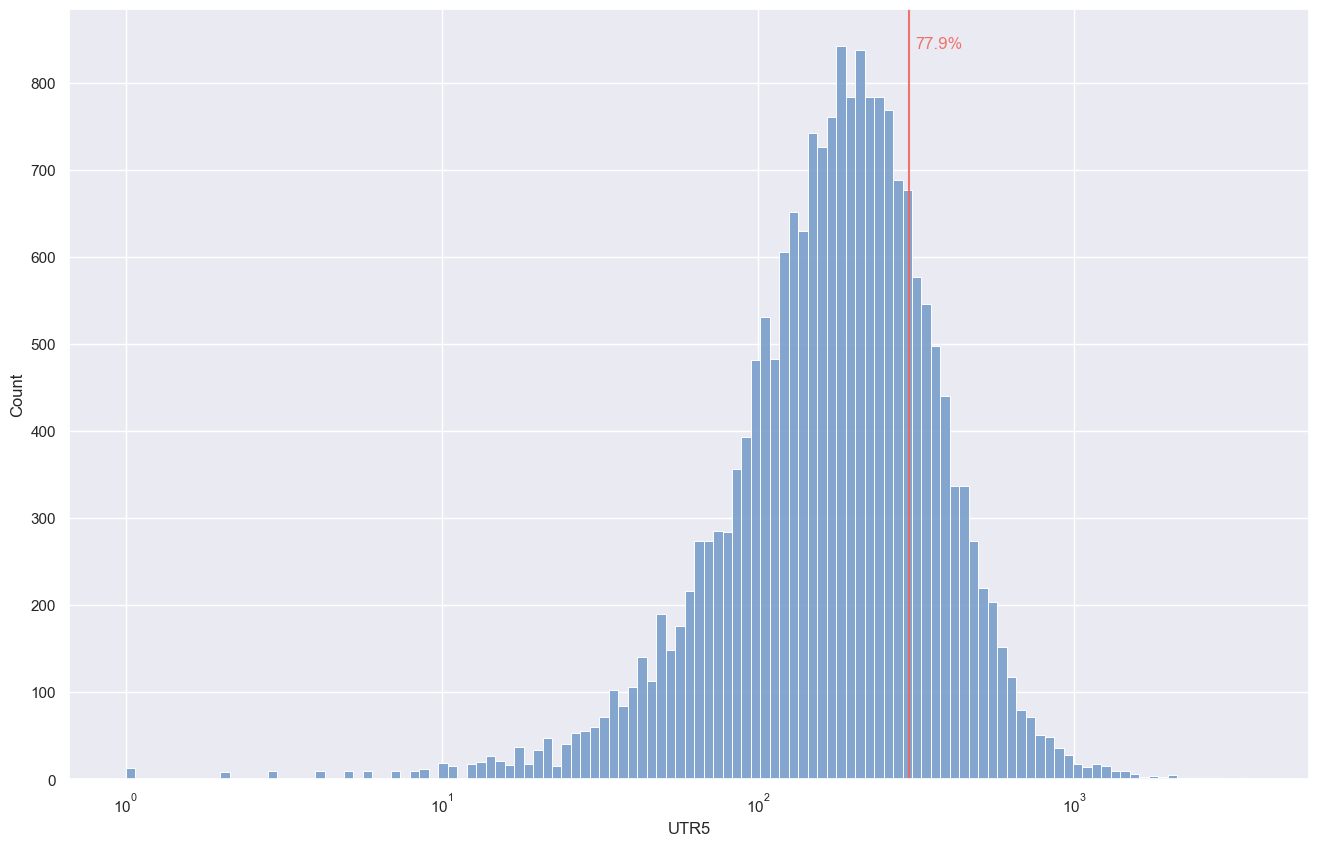

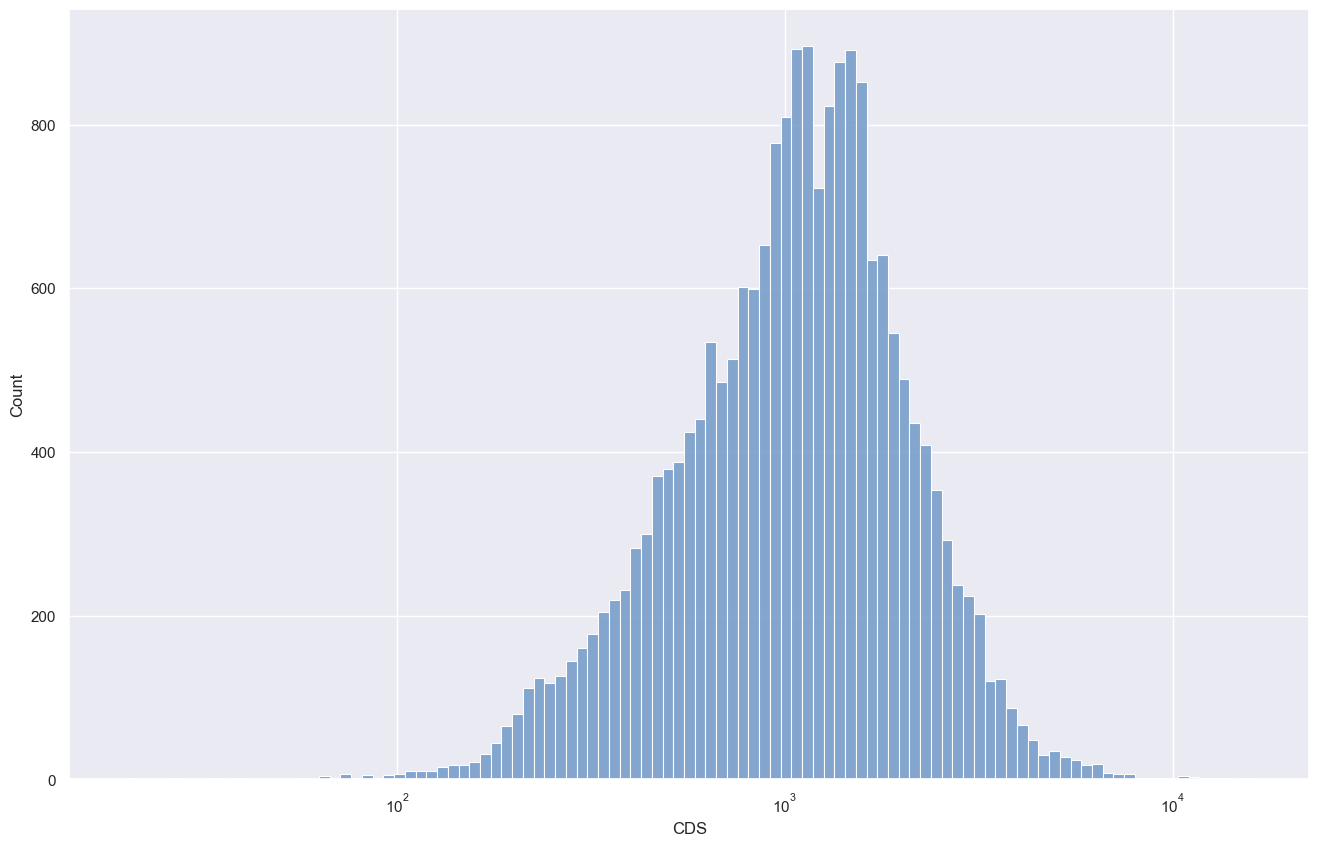

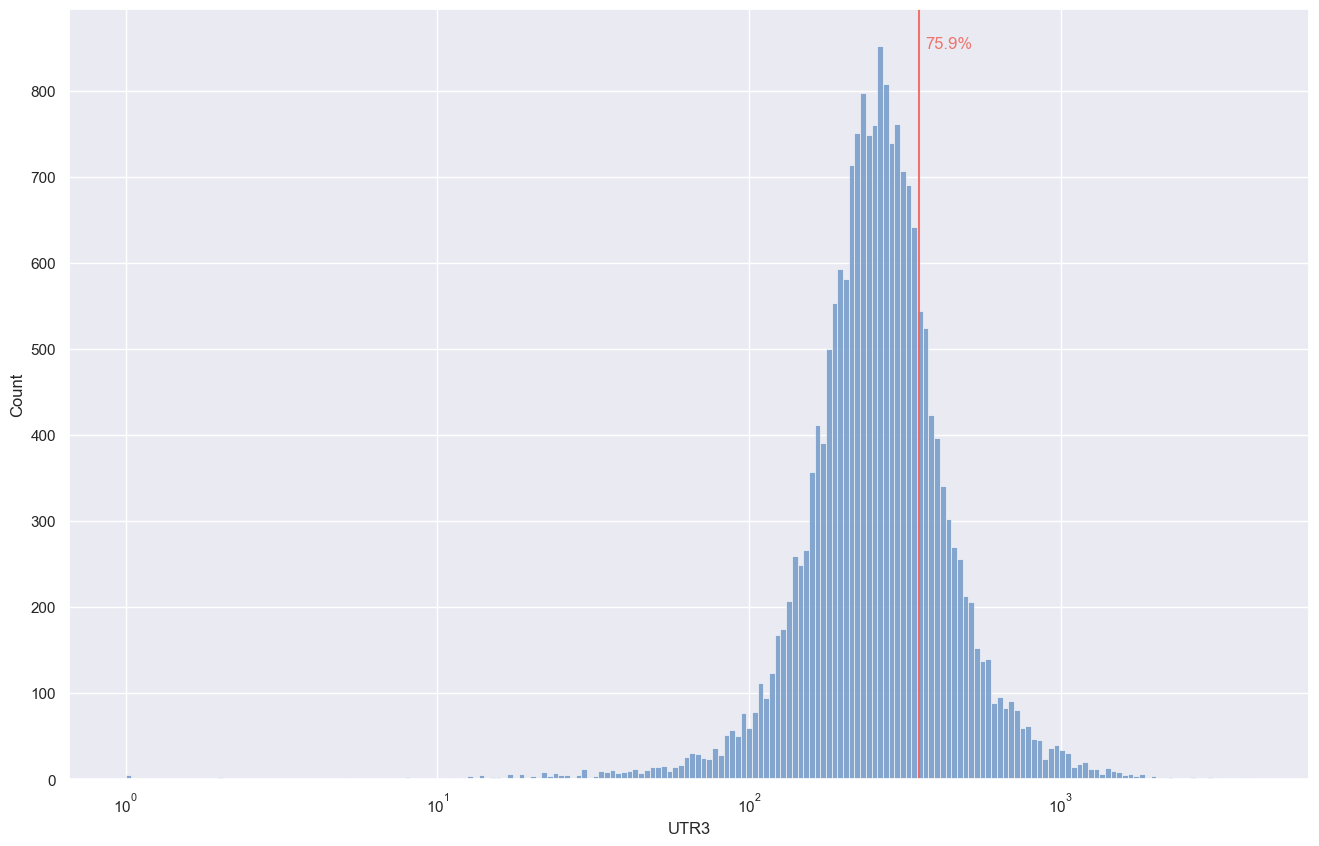

In [37]:
# Display the region length distributions per each region (grouped regions)

dataframe = analysis_annotation.group_regions(
	data    = gene_annotation,
	groupby = 'Transcript',
	regions = ['mRNA', 'UTR5', 'CDS', 'UTR3']
)

with warnings.catch_warnings() :
	warnings.simplefilter('ignore')

	for group, vline in zip(['mRNA', 'UTR5', 'CDS', 'UTR3'], [0, 300, 0, 350]) :
		analysis_annotation.length_histplot(
			data     = dataframe,
			value    = group,
			vline    = vline,
			filename = os.path.join(OUT_PLOT, 'length-transcript-' + group.lower())
		)